In [2]:
import pandas as pd
import numpy as np

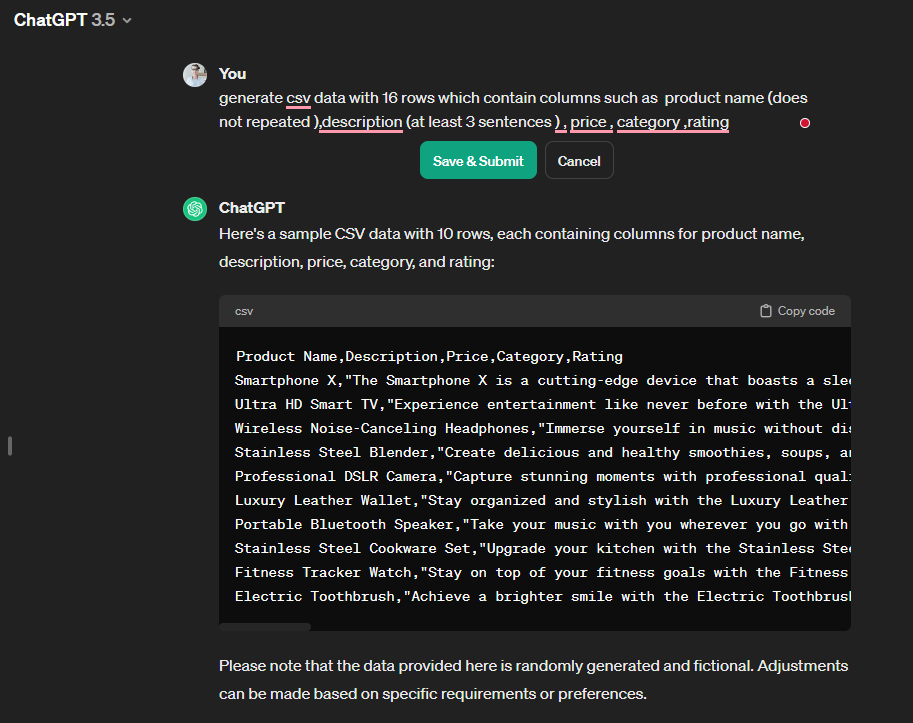

In [3]:
df=pd.read_csv("data/Generated_Product_Data.csv")

In [4]:
df.head()

,Product Name,Description,Price,Category,Rating
0,Laptop,The new XYZ laptop is perfect for both work an...,$999,Electronics,4.5
1,Smartphone,Stay connected and organized with the latest A...,$799,Electronics,4.2
2,Running Shoes,Hit the ground running with our comfortable an...,$99,Footwear,4.6
3,Yoga Mat,Achieve zen with our premium yoga mat. Made fr...,$49,Fitness,4.8
4,Coffee Maker,Start your day right with our state-of-the-art...,$129,Kitchen Appliances,4.3


In [9]:
print(df["Description"][0])

The new XYZ laptop is perfect for both work and play. With its sleek design and high performance, you can breeze through your daily tasks with ease. It comes with a powerful processor, ample storage, and a crisp display.


In [10]:
df["Product Name"][0]

'Laptop'

In [11]:
df.sample(5)

,Product Name,Description,Price,Category,Rating
13,Backpack,Stay organized on the go with our versatile ba...,$69,Travel & Accessories,4.5
3,Yoga Mat,Achieve zen with our premium yoga mat. Made fr...,$49,Fitness,4.8
5,Wireless Headphones,Cut the cord and enjoy the freedom of wireless...,$79,Electronics,4.4
0,Laptop,The new XYZ laptop is perfect for both work an...,$999,Electronics,4.5
7,Gaming Chair,Upgrade your gaming setup with our ergonomic g...,$199,Home & Office,4.5


In [12]:
df.iloc[0,1]

'The new XYZ laptop is perfect for both work and play. With its sleek design and high performance, you can breeze through your daily tasks with ease. It comes with a powerful processor, ample storage, and a crisp display.'

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Lowercase the tokens
    tokens = [word.lower() for word in tokens]
    
    # Join the tokens back into a single string
    processed_text = ' '.join(tokens)
    
    return processed_text

df["Description"]=df["Description"].apply(preprocess_text)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [14]:
# data preprocessed
df["Description"][0]

'new xyz laptop perfect work play sleek design high performance breeze daily task ease come powerful processor ample storage crisp display'

##  Setting Chromadb and Saving Vector Embedding in DB

- Commands :
    - docker pull chromadb/chroma
    - docker run -p 8000:8000 chromadb/chroma

- https://realpython.com/chromadb-vector-database/

In [15]:
import chromadb
from chromadb.utils import embedding_functions


EMBED_MODEL = "all-MiniLM-L6-v2"
embedding_func = embedding_functions.SentenceTransformerEmbeddingFunction(
    model_name=EMBED_MODEL)

d:\Data Science\Projects\ML-Project2--Product-Similarity-API\MLp2Env\Lib\site-packages\onnxruntime\capi\onnxruntime_validation.py:26: UserWarning: Unsupported Windows version (11). ONNX Runtime supports Windows 10 and above, only.
  warnings.warn(
d:\Data Science\Projects\ML-Project2--Product-Similarity-API\MLp2Env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
import chromadb


chroma_client = chromadb.HttpClient(host="localhost", port=8000)

collection=chroma_client.create_collection(name="Description_Vector",
                                           embedding_function=embedding_func,
                                           metadata={"hnsw:space": "cosine"})

collection.add(
    documents=list(df["Description"]),
    metadatas=[i.to_dict() for j,i in df.iterrows()],
    ids=[str(i) for i in range(len(df))]
)

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

def preprocess_text(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words and word not in string.punctuation]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    tokens = [word.lower() for word in tokens]
    processed_text = ' '.join(tokens)
    return processed_text


result= collection.query(
    query_texts=[preprocess_text("smartphone having camera and other features. please suggest me")])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [19]:
products=list()
for i in range(len(result["metadatas"][0])):
    products.append(result["metadatas"][0][i])

In [25]:
int(products[0]["Price"][1:])

799

In [26]:
min_price=0
max_price=1000
min_rating=3
max_rating=5
a=[]
for i in products:
    if int(i["Price"][1:])>min_price and int(i["Price"][1:])<max_price and i["Rating"]>min_rating and i["Rating"]<max_rating :
        a.append(i)

    

In [27]:
i

{'Category': 'Apparel',
 'Description': "make statement elegant versatile dress whether 're attending formal event casual gathering dress sure turn head flattering silhouette high-quality fabric 'll feel confident stylish wherever go",
 'Price': '$129',
 'Product Name': 'Dress',
 'Rating': 4.7}